The task is SMS Spam Classification.
We are given a dataset (sms_spam.csv) with two columns:

type → whether the message is ham (not spam) or spam.

text → the SMS message content.

The goal: Build a Machine Learning model that can classify new SMS messages as spam or ham.

In [ ]:
# Importing the required librareis
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# ML Classifcation Model
from sklearn.naive_bayes import MultinomialNB

# validation metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# importing data
data = pd.read_csv('/content/sms_spam.csv')

# data sample
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# data dimension
data.shape

(5574, 2)

In [ ]:
# Null value check
data.isnull().sum()

,0
type,0
text,0


In [25]:
# data distribution of target
# Shows % of spam vs ham.
round(data['type'].value_counts(normalize=True)*100, 2)

,proportion
type,
0,86.6
1,13.4


In [ ]:
# stats nature of the text column wrt target
data.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [ ]:
# creating a length column to understand more about the text
data['length'] = data['text'].apply(len)
data.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


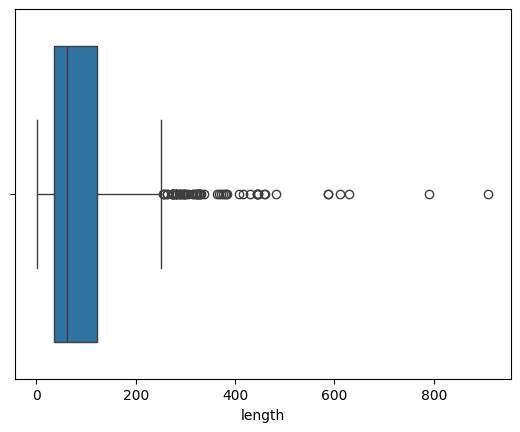

In [ ]:
# Distribution of the text column
sns.boxplot(data['length'], orient='h')
plt.show()

In [ ]:
# stats of message length
data['length'].describe()

,length
count,5574.000000
mean,80.444923
std,59.841828
min,2.000000
25%,36.000000
50%,61.000000
75%,122.000000
max,910.000000


In [ ]:
# understand the overall lengthy message
data[data['length'] == data['length'].max()]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [ ]:
# understand the overall shortest message
data[data['length'] == data['length'].min()]['text'].value_counts()

,count
text,
Ok,4
:),1


In [ ]:
# function to remove stopwords and puntuations
def text_preprocessing(message):
    clean_text = ''.join([char for char in message if char not in string.punctuation])
    return ' '.join([word for word in clean_text.split() if word.lower() not in stopwords.words('english')])

In [ ]:
# encode the target
data['type'] = data['type'].map({'ham': 0, 'spam': 1})

# data sample
data.head()

,type,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# removing the stopwords and puntuations manually
data['clean_text'] = data['text'].apply(text_preprocessing)

In [ ]:
# sample data after preprocessing
data.head()

,type,text,length,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though


In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(data['clean_text'], data['type'], test_size=0.2, random_state=42)

# vectorization
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Naive Bayes Model

In [ ]:
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)
print('Training Score:', round(model.score(x_train_tfidf, y_train)*100, 2), '%')

Training Score: 97.78 %


Testing Score: 96.77 %

Classification Report:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       1.00      0.78      0.87       161

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



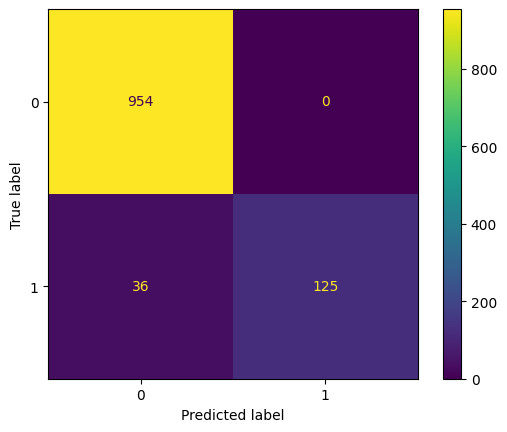

In [ ]:
# model testing
y_pred = model.predict(x_test_tfidf)

# metrics
print('Testing Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('\nClassification Report:\n\n', report)

In [ ]:
# prediction for the real time user message
def predict_message():
    mes = str(input('Enter a message to predict:'))
    input_tfidf = vectorizer.transform([mes])
    predict = model.predict(input_tfidf)
    return 'The message is Spam' if predict[0] == 1 else 'The message is ham'

In [ ]:
# input message
predict_message()

Enter a message to predict:20% discount on all jeans


'The message is ham'

In [ ]:
# input message
predict_message()

Enter a message to predict:Free entry in 2 a wkly comp to win FA Cup final


'The message is Spam'